# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Introduction to Density Estimation and Clustering

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. 


In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import astropy
import sys, os
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
import urllib
from astropy.io import fits

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

### Introduction

Topics:
 
- Density Estimation
- Clustering

#### Density Estimation

Density estimation is the use of point data to estimate the probability density distribution, and it is a form of data smoothing.

A very simple form of density estimation is a histogram. This is valuable for data exploration, but not a good idea for statistical analysis. Some problems with histograms include variations due to the bin sizes and locations, and that the discontinuities between bins may not reflect the true distribution of the population. 

It is advantageous, and often necessary, to estimate the density distribution nonparametrically, that is without the use of a model that presupposes the distribution can be described by a parameterized model, or even the bin sizes and locations of a histogram. This is because the use of a model can bias the analysis in a particular direction and obscure potentially important features. And a nonparametric analysis may be necessary if one has no particular model already. Non-parametric density estimation is a fundamental tool in data exploration.

Parametric density estimation is valuable if one knows (or suspects) that the data will match some known pdf. This is because one can generally specify or describe the pdf with a relatively small number number of parameters compared to the non-parametric approach. 

#### Clustering

Clustering methods are used to identify various regions within a pdf. One can then use the pdfs for different regions to assign a probability that each point is associated with a given region, which is used for classification. 

Clustering methods are split into unsupervised and supervised methods. Unsupervised methods do not use prior information about the structure of potential clusters in the data, while supervised methods 

### Kernel Density Estimation

The appearance of a one-dimensional histogram can be sensitive to the location of bin edges and bin sizes, and such differences can impact the interpretation of the data. 

In a histogram, each point contributes one unit to the height of its bin. In KDE, each point has its own bin of unit height and some fixed width. The distribution is then the sum of all of these boxes. The unit bin for each point is called the kernel, and in this case the rectangular box is called a tophat kernel, and the width is a fixed parameter called the bandwidth. 

A fixed bandwidth is already a better way to estimate the density than a histogram, although it does not produce a smooth (differentiable) distribution, and may have unsightly features such as spikes in the distribution. For these reasons, many other kernels are used, such as a Gaussian, Epanechnikov, exponential, triangle, etc. 

The Epanechnikov kernel is:

$$
K(x) = \frac{3}{4} (1 - x^2)
$$
for $|x| \leq 1$ and zero otherwise. This has been claimed to be the theoretically optimal kernal in terms of the minimum variance. 

For $N$ data points $x_i$ that are drawn from a distribution $p(x)$, the kernel density estimate of $p(x)$ is

$$
\hat{p}_h(x) = \frac{1}{N h} \sum^N_{i=1} K \left( \frac{x - x_i}{h} \right)
$$

where $K$ is the kernel function and $h$ is the bandwidth. The estimate $\hat{p}_h(x)$ provides the density estimate at each point $x$ based on the sum of the contributions of each point $x_i$, where these contributions are distributed over a range of $x$ by the kernel, and not to a single value at $x_i$. 

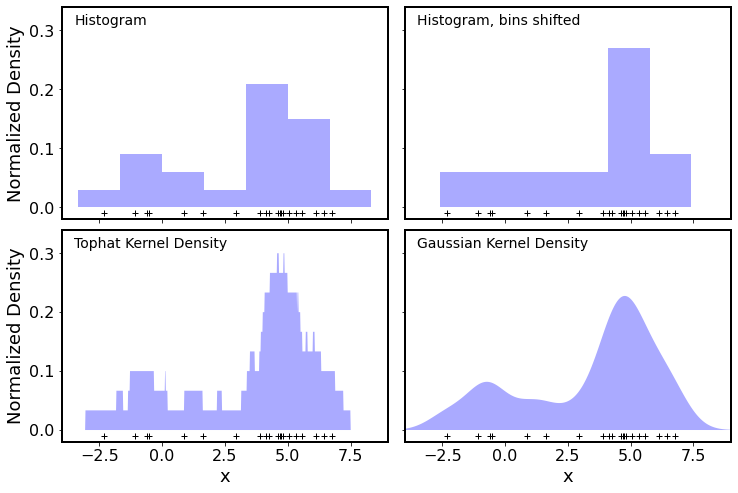

In [2]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
#
# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

Say something about available kernels, operation of Kernel Density Estimator in scikit-learn

Text(0.5, 1.0, 'Available Kernels')

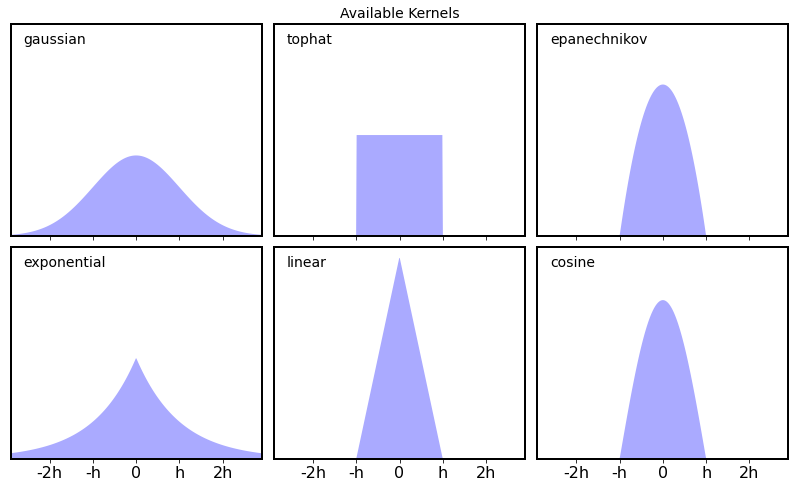

In [3]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
#
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,8))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x


for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

Show this example. Maybe add a histogram too.

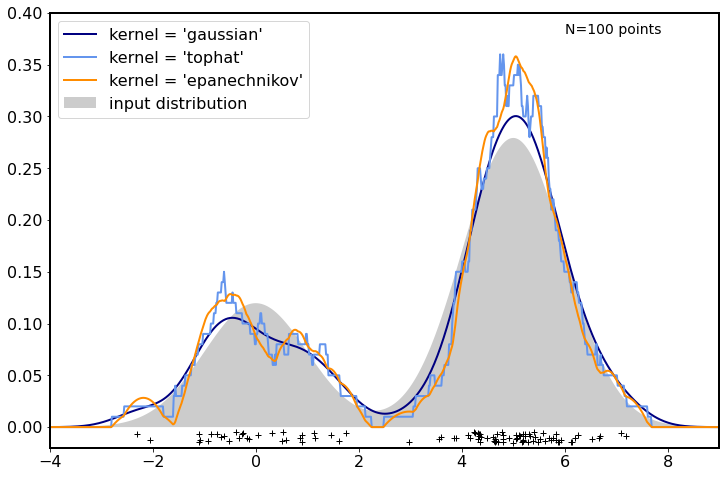

In [4]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
#
# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(12,8))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

While KDE is called a non-parametric density estimation method, the width of the kernel is a parameter. The kernel is also a parameter, although the estimate of the pdf is less sensitive to the choice of kernel than the choice of width. In the limit of zero width, the estimate reduces to the point data, and if the width is too large, this could hide important features in the data. 

Two methods to estimate the width are cross-validation and the mean integrated square error. 

#### Cross Validation

Cross validation is a method that uses one subset of the data to train a model and another subset to test or validate the model. The goal is to test the performance of a given model with data that were not used to construct the model. This can occur with a single division of the data into a training and a testing set, although it is more common (and generally more powerful) to use multiple iterations of random training and testing subsets and then combine the results of these iterations.  

Cross validation methods are commonly split into exhaustive and non-exhaustive methods. Exhaustive methods calculate every possible division of the original sample, and non-exhaustive ones do not. For large datasets, non-exhaustive methods are more commonly used as they are more computationally tractable. 

Exhaustive methods can be generalized as 'leave-k-out cross validation,' where k is the number of observations in the validation set that are 'left out' of the training set. For $n$ data points, the number of iterations is the binomial coefficient: 
$$
C^n_k = \binom{n}{k} = \frac{n!}{k! (n-k)!}
$$
This quickly becomes very large for even moderate sample sizes. 

A simple version of this is to set $k = 1$. This is similar to jackknife resampling, except the cross validation is computed with the sample that is left out (validation sample) and not the samples with $n-1$ elements. In this case the cross validation is:
$$
CV_l (h) = \frac{1}{N} \sum^N_{i=1} \log \hat{f}_{h,-i}(x_i)
$$
and $\hat{f}_{h,-i}(x_i)$ is the KDE for the sample without element $i$. One can then solve for $h$ by minimizing $CV_l(h)$. 

#### Mean Integrated Square Error

The Mean Integrated Square Error (MISE) is a risk or cost function that ascribes some cost to an event, and thereby provides a way to compare different outcomes. The MISE for some bandwidth $h$ is equal to the expectation value of the integral:

$$
\mathrm{MISE} (h) = \langle \int \left( \hat{f}_h(x) - f(x) \right)^2 dx \rangle
$$

where $\hat{f}_h(x)$ is the KDE for bandwidth $h$. 

### Gaussian Mixture Model

Example of parametric density estimation

### Clustering

Two-point correlation function

Landy-Szalay estimator

### SDSS QSO Catalog

In [5]:
# Download an early SDSS QSO catalog, simply because the file size is small
qsocaturl = 'http://classic.sdss.org/dr4/products/value_added/dr1qso.fits'
qsofile = 'dr1qso.fits'
if not os.path.isfile(qsofile): 
    urllib.request.urlretrieve(qsocaturl, qsofile)

In [6]:
qhdu = fits.open(qsofile)
qhdu.info()


Filename: dr1qso.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    171   16713R x 52C   [18A, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, J, J, I, I, 25A]   


Text(0, 0.5, 'r - i')

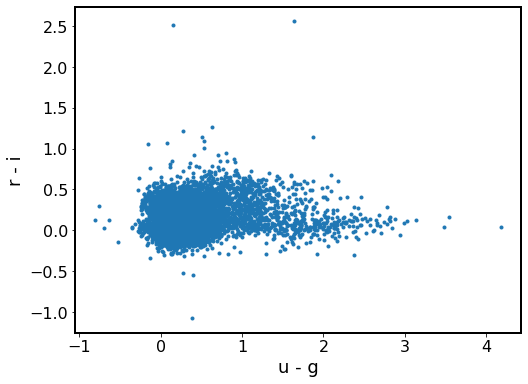

In [7]:
plt.figure(figsize=(8, 6))
pmask = qhdu[1].data['psfmagerr_u'] < 0.3
pmask = pmask*(qhdu[1].data['psfmagerr_g'] < 0.3)
plt.plot( qhdu[1].data['psfmag_u'][pmask] - qhdu[1].data['psfmag_g'][pmask], 
         qhdu[1].data['psfmag_r'][pmask] - qhdu[1].data['psfmag_i'][pmask], '.')
plt.xlabel('u - g')
plt.ylabel('r - i')
